In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics
import sklearn.metrics as metrics
import tensorflow as tf
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go

In [2]:
train = pd.read_csv("new_train.csv")
test = pd.read_csv("new_test.csv")

In [3]:
train

Unnamed: 0                              bidder_id  \
0              0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1              1  624f258b49e77713fc34034560f93fb3hu3jo   
2              2  1c5f4fc669099bfbfac515cd26997bd12ruaj   
3              3  4bee9aba2abda51bf43d639013d6efe12iycd   
4              4  4ab12bc61c82ddd9c2d65e60555808acqgos1   
...          ...                                    ...   
2008        2008  369515b3af4f8ca582f90271d30b14b6r52aw   
2009        2009  f939c17ffc7c39ac9b35b69e5e75179fv9pe2   
2010        2010  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
2011        2011  0381a69b7a061e9ace2798fd48f1f537mgq57   
2012        2012  84a769adc98498f52debfe57b93a0789556f4   

                            payment_account  \
0     a3d2de7675556553a5f08e4c88d2c228754av   
1     a3d2de7675556553a5f08e4c88d2c228v1sga   
2     a3d2de7675556553a5f08e4c88d2c2280cybl   
3     51d80e233f7b6a7dfdee484a3c120f3b2ita8   
4     a3d2de7675556553a5f08e4c88d2c22857ddh   
...                                     ...   
2008  a1f85275793c4a782f0a668711f41b927ivc9   
2009  a3d2de7675556553a5f08e4c88d2c2286s1m2   
2010  a3d2de7675556553a5f08e4c88d2c22856leq   
2011  fd87037ce0304077079c749f420f0b4c54uo0   
2012  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   

                                    address  outcome  auction  merchandise  \
0     a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0     18.0          1.0   
1     ae87054e5a97a8f840a3991d12611fdcrfbq3      0.0      1.0          1.0   
2     92520288b50f03907041887884ba49c0cl0pd      0.0      4.0          1.0   
3     4cb9717c8ad7e88a9a284989dd79b98dbevyi      0.0      1.0          1.0   
4     2a96c3ce94b3be921e0296097b88b56a7x1ji      0.0     23.0          1.0   
...                                     ...      ...      ...          ...   
2008  e6882cf204a9482edd042b6e31791dfctxzx8      0.0     25.0          1.0   
2009  b9b03d5a127eb07aeb9163cdcf524e1344ac9      0.0      1.0          1.0   
2010  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0      1.0          1.0   
2011  f030a221726fbcdfc4dc7dfd1b381a112hieq      0.0      1.0          1.0   
2012  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0      1.0          1.0   

      device   time  country  ...  max_url_per_auction  min_url_per_auction  \
0       14.0   24.0      6.0  ...                  1.0                  1.0   
1        2.0    3.0      1.0  ...                  2.0                  2.0   
2        2.0    4.0      1.0  ...                  1.0                  1.0   
3        1.0    1.0      1.0  ...                  1.0                  1.0   
4       53.0  155.0      2.0  ...                 21.0                  1.0   
...      ...    ...      ...  ...                  ...                  ...   
2008     4.0   33.0      4.0  ...                  1.0                  1.0   
2009     1.0    1.0      1.0  ...                  1.0                  1.0   
2010     2.0    2.0      1.0  ...                  1.0                  1.0   
2011     1.0    1.0      1.0  ...                  1.0                  1.0   
2012     1.0    2.0      1.0  ...                  1.0                  1.0   

      std_url_per_auction  total_no_of_participated_auctions  \
0                0.000000                               18.0   
1                0.000000                                1.0   
2                0.000000                                4.0   
3                0.000000                                1.0   
4                5.644263                               23.0   
...                   ...                                ...   
2008             0.000000                               25.0   
2009             0.000000                                1.0   
2010             0.000000                                1.0   
2011             0.000000                                1.0   
2012             0.000000                                1.0   

      no_of_auction_exceeds_threshold  percentage_of_auctions_above_threshold

In [4]:
train.drop(train.filter(regex="Unname"),axis=1, inplace=True)
test.drop(test.filter(regex="Unname"),axis=1, inplace=True)

In [5]:
X = train.drop(columns=['bidder_id', 'payment_account', 'address', 'outcome','merchandise']) 
y = train['outcome']
X_test_original = test.drop(columns=['bidder_id', 'payment_account', 'address', 'merchandise'])

### Scaling the training and test dataset

In [6]:
X.shape

(2013, 52)

In [7]:
X.columns

Index(['auction', 'device', 'time', 'country', 'ip', 'url', 'num_bids',
       'num_first_bids', 'num_last_bids', 'time_to_bid', 'inst_resp',
       'perc_inst_resp', 'auto parts', 'books and music', 'clothing',
       'computers', 'furniture', 'home goods', 'jewelry', 'mobile',
       'office equipment', 'sporting goods', 'num_bids_per_auction',
       'num_bids_per_device', 'num_bids_per_country', 'num_bids_per_ip',
       'on_ip_that_has_a_bot_mean', 'ip_entropy', 'url_entropy',
       'mean_country_per_auction', 'max_country_per_auction',
       'min_country_per_auction', 'std_country_per_auction',
       'mean_devices_per_auction', 'max_devices_per_auction',
       'min_devices_per_auction', 'std_devices_per_auction',
       'mean_ip_per_auction', 'max_ip_per_auction', 'min_ip_per_auction',
       'std_ip_per_auction', 'mean_url_per_auction', 'max_url_per_auction',
       'min_url_per_auction', 'std_url_per_auction',
       'total_no_of_participated_auctions', 'no_of_auction_excee

In [8]:
scaler = StandardScaler()
# scaled_features = data.copy()
col_names = ['auction', 'device', 'time', 'country', 'ip', 'url', 'num_bids',
       'num_first_bids', 'num_last_bids', 'time_to_bid', 'inst_resp',
       'perc_inst_resp', 'num_bids_per_auction',
       'num_bids_per_device', 'num_bids_per_country', 'num_bids_per_ip',
       'on_ip_that_has_a_bot_mean', 'ip_entropy', 'url_entropy',
       'mean_country_per_auction', 'max_country_per_auction',
       'min_country_per_auction', 'std_country_per_auction',
       'mean_devices_per_auction', 'max_devices_per_auction',
       'min_devices_per_auction', 'std_devices_per_auction',
       'mean_ip_per_auction', 'max_ip_per_auction', 'min_ip_per_auction',
       'std_ip_per_auction', 'mean_url_per_auction', 'max_url_per_auction',
       'min_url_per_auction', 'std_url_per_auction',
       'total_no_of_participated_auctions', 'no_of_auction_exceeds_threshold',
       'percentage_of_auctions_above_threshold', 'total_no_of_bidded_category',
       'no_of_merchandise_exceeds_threshold',
       'percentage_of_merchandise_above_threshold',
       'on_url_that_has_a_bot_mean']

train_features = X[col_names]
scaler = StandardScaler().fit(train_features.values)
train_features = scaler.transform(train_features.values)
X[col_names] = train_features

test_features = X_test_original[col_names]
scaler_test = StandardScaler().fit(test_features.values)
test_features = scaler_test.transform(test_features.values)
X_test_original[col_names] = test_features

In [9]:
selected_features = ['num_bids_per_ip', 'num_bids_per_auction', 'num_bids_per_country', 'mean_ip_per_auction', 'perc_inst_resp', 'time', 'mean_url_per_auction', 'inst_resp', 'num_bids', 'time_to_bid', 'num_last_bids', 'on_url_that_has_a_bot_mean', 'device', 'percentage_of_auctions_above_threshold', 'num_bids_per_device', 'ip_entropy', 'ip', 'max_country_per_auction', 'max_ip_per_auction', 'mean_devices_per_auction', 'url_entropy', 'std_ip_per_auction', 'url', 'max_devices_per_auction', 'no_of_auction_exceeds_threshold', 'std_devices_per_auction', 'std_url_per_auction', 'country', 'num_first_bids', 'mobile']
X = X[selected_features]
X_test_original = X_test_original[selected_features]

In [10]:
X.shape

(2013, 30)

### Helper Functions

In [11]:
def evaluate(model, X_train, y_train, X_test, y_test):
    print("TRAIN")
    train_predictions = model.predict_proba(X_train)
    train_pred = model.predict(X_train)
        
    train_accuracy = accuracy_score(y_train, train_pred)
    train_auc_roc_score = roc_auc_score(y_train,train_predictions[:,1])
    train_fbeta = fbeta_score(y_train, train_pred, average='binary', beta=2.0)
    
    print("Classification report")
    print(classification_report(y_train, train_pred, digits = 4))
    
    print("FBeta Score")
    print(fbeta_score(y_train, train_pred, average='binary', beta=2.0))
    
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(train_accuracy))
    print('AUC ROC = {:0.4f}%.'.format(train_auc_roc_score))
    print("*" * 100)
    
    print("TEST")
    
    test_predictions = model.predict_proba(X_test)
    test_pred = model.predict(X_test)
        
    test_accuracy = accuracy_score(y_test, test_pred)
    test_auc_roc_score = roc_auc_score(y_test,test_predictions[:,1])
    test_fbeta = fbeta_score(y_test, test_pred, average='binary', beta=2.0)
    
    print("Classification report")
    print(classification_report(y_test, test_pred, digits = 4))
    
    print("FBeta Score")
    print(fbeta_score(y_test, test_pred, average='binary', beta=2.0))
    
    print('Model Performance')
    print('Accuracy = {:0.4f}%.'.format(test_accuracy))
    print('AUC ROC = {:0.4f}%.'.format(test_auc_roc_score))
    print("*" * 100)
    
    return [train_accuracy, train_auc_roc_score, train_fbeta, test_accuracy, test_auc_roc_score, test_fbeta]

In [12]:
def process_results(arr):
    train_accuracy = []
    train_auc_roc_score = [] 
    train_fbeta = []
    test_accuracy = []
    test_auc_roc_score = []
    test_fbeta = []
    
    for item in arr:
        train_accuracy.append(item[0])
        train_auc_roc_score.append(item[1])
        train_fbeta.append(item[2])
        test_accuracy.append(item[3])
        test_auc_roc_score.append(item[4])
        test_fbeta.append(item[5])
    
    mean_accuracy = np.array(train_accuracy).mean()
    mean_train_auc_roc_score = np.array(train_auc_roc_score).mean()
    mean_train_fbeta = np.array(train_fbeta).mean()
    mean_test_accuracy = np.array(test_accuracy).mean()
    mean_test_auc_roc_score = np.array(test_auc_roc_score).mean()
    mean_test_fbeta = np.array(test_fbeta).mean()
    
    print("final train accuracy: " + str(mean_accuracy))
    print("final train AUC: " + str(mean_train_auc_roc_score))
    print("final train fbeta: " + str(mean_train_fbeta))
    print("final test accuracy: " + str(mean_test_accuracy))
    print("final test AUC: " + str(mean_test_auc_roc_score))
    print("final test fbeta: " + str(mean_test_fbeta))

### SKFold + SMOTE (Grid Search)

In [13]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

over = SMOTE(sampling_strategy=0.2, random_state = 42)
under = RandomUnderSampler(sampling_strategy=0.4, random_state = 42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [15]:
print("GRID SEARCH DECISION TREE EXPERIMENT")
dt_grid = {'criterion': ['entropy'],
    'max_depth': [50,60,70],
    'max_features': [20,25,30],
    'min_impurity_decrease': [0.0005, 0.0004, 0.0006],
    'min_samples_leaf': [19,21,23],
    'min_samples_split': [7,8,9]
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = skf, n_jobs = -1, verbose = 2, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

dt_best_grid = dt_grid.best_estimator_
dt_grid_accuracy = evaluate(dt_best_grid, X_train, y_train, X_test, y_test)
print("Best Params Grid Search for DT")
print(dt_grid.best_params_)

y_pred_prob = dt_best_grid.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DECISION TREE ROC Curve')
plt.show()


GRID SEARCH DECISION TREE EXPERIMENT
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.5s


TRAIN
Classification report
              precision    recall  f1-score   support

         0.0     0.9484    0.9128    0.9303       665
         1.0     0.8007    0.8759    0.8366       266

    accuracy                         0.9023       931
   macro avg     0.8746    0.8944    0.8834       931
weighted avg     0.9062    0.9023    0.9035       931

FBeta Score
0.8597785977859779
Model Performance
Accuracy = 0.9023%.
AUC ROC = 0.9649%.
****************************************************************************************************
TEST
Classification report
              precision    recall  f1-score   support

         0.0     0.9866    0.8908    0.9362       577
         1.0     0.2410    0.7407    0.3636        27

    accuracy                         0.8841       604
   macro avg     0.6138    0.8158    0.6499       604
weighted avg     0.9532    0.8841    0.9107       604

FBeta Score
0.5235602094240837
Model Performance
Accuracy = 0.8841%.
AUC ROC = 0.9029%.
**************

[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:    4.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


GRID SEARCH RANDOM FOREST EXPERIMENT
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.8min finished


TRAIN
Classification report
              precision    recall  f1-score   support

         0.0     0.9970    0.9985    0.9977       665
         1.0     0.9962    0.9925    0.9944       266

    accuracy                         0.9968       931
   macro avg     0.9966    0.9955    0.9960       931
weighted avg     0.9968    0.9968    0.9968       931

FBeta Score
0.9932279909706544
Model Performance
Accuracy = 0.9968%.
AUC ROC = 1.0000%.
****************************************************************************************************
TEST
Classification report
              precision    recall  f1-score   support

         0.0     0.9808    0.9723    0.9765       577
         1.0     0.5000    0.5926    0.5424        27

    accuracy                         0.9553       604
   macro avg     0.7404    0.7824    0.7594       604
weighted avg     0.9593    0.9553    0.9571       604

FBeta Score
0.5714285714285714
Model Performance
Accuracy = 0.9553%.
AUC ROC = 0.9029%.
**************

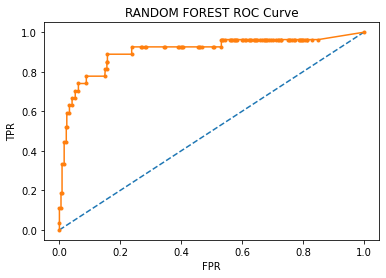

In [16]:
print("GRID SEARCH RANDOM FOREST EXPERIMENT")
rf_grid = {
    'bootstrap': [False],
    'max_depth': [90,100,110],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4,5,6],
    'n_estimators': [1100,1200,1300]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_grid, cv = skf, n_jobs = -1, verbose = 2, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

rf_best_grid = rf_grid.best_estimator_
rf_grid_accuracy = evaluate(rf_best_grid, X_train, y_train, X_test, y_test)
print("Best Params Grid Search for RF")
print(rf_grid.best_params_)

y_pred_prob = rf_best_grid.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RANDOM FOREST ROC Curve')
plt.show()

In [17]:
print("GRID SEARCH XGB EXPERIMENT")
xgb_grid = {
    'max_depth':[3,4,5],
    'min_child_weight':[1,2,3],
    'gamma':[0.2, 0.3, 0.4],
    'subsample':[0.8, 0.9, 1.0],
    'colsample_bytree':[0.7, 0.8, 0.9]
}

xgb = XGBClassifier(random_state=42, eval_metric="error")
xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_grid, scoring='roc_auc',n_jobs=-1, cv=skf)
xgb_grid.fit(X_train, y_train)

xgb_best_grid = xgb_grid.best_estimator_
xgb_grid_accuracy = evaluate(xgb_best_grid, X_train, y_train, X_test, y_test)
print("Best Params Grid Search for XGB")
print(xgb_grid.best_params_)

y_pred_prob = rf_best_grid.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBOOST ROC Curve')
plt.show()

GRID SEARCH XGB EXPERIMENT


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


TRAIN
Classification report
              precision    recall  f1-score   support

         0.0     0.9970    1.0000    0.9985       665
         1.0     1.0000    0.9925    0.9962       266

    accuracy                         0.9979       931
   macro avg     0.9985    0.9962    0.9974       931
weighted avg     0.9979    0.9979    0.9978       931

FBeta Score
0.9939759036144578
Model Performance
Accuracy = 0.9979%.
AUC ROC = 1.0000%.
****************************************************************************************************
TEST
Classification report
              precision    recall  f1-score   support

         0.0     0.9791    0.9723    0.9757       577
         1.0     0.4839    0.5556    0.5172        27

    accuracy                         0.9536       604
   macro avg     0.7315    0.7639    0.7464       604
weighted avg     0.9569    0.9536    0.9552       604

FBeta Score
0.5395683453237411
Model Performance
Accuracy = 0.9536%.
AUC ROC = 0.8936%.
**************

In [18]:
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


print("GRID SEARCH ANN EXPERIMENT")
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

ann_grid = dict(learn_rate=learn_rate,momentum=momentum,batch_size=batch_size, epochs=epochs)

ann = KerasClassifier(build_fn=create_model, verbose=0)
ann_grid = GridSearchCV(estimator = ann, param_grid = ann_grid, n_jobs=-1, cv=skf, scoring='roc_auc')
ann_grid.fit(X_train, y_train)

ann_best_grid = ann_grid.best_estimator_
ann_grid_accuracy = evaluate(ann_best_grid, X_train, y_train, X_test, y_test)
print("Best Params Grid Search for ANN")
print(ann_grid.best_params_)

y_pred_prob = ann_best_grid.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ANN ROC Curve')
plt.show()

GRID SEARCH ANN EXPERIMENT


2021-11-08 14:51:38.919355: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-08 14:51:38.919346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-08 14:51:38.919507: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

TRAIN
Classification report
              precision    recall  f1-score   support

         0.0     0.9798    0.9459    0.9625       665
         1.0     0.8754    0.9511    0.9117       266

    accuracy                         0.9474       931
   macro avg     0.9276    0.9485    0.9371       931
weighted avg     0.9499    0.9474    0.9480       931

FBeta Score
0.9349593495934959
Model Performance
Accuracy = 0.9474%.
AUC ROC = 0.9848%.
****************************************************************************************************
TEST
Classification report
              precision    recall  f1-score   support

         0.0     0.9814    0.9133    0.9461       577
         1.0     0.2537    0.6296    0.3617        27

    accuracy                         0.9007       604
   macro avg     0.6176    0.7715    0.6539       604
weighted avg     0.9489    0.9007    0.9200       604

FBeta Score
0.4857142857142858
Model Performance
Accuracy = 0.9007%.
AUC ROC = 0.7698%.
**************

### Stacking

In [18]:
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [19]:
models_dict = {
    'decision_tree': dt_best_grid,
    'random_forest': rf_best_grid,
    'xgb': xgb_best_grid
}

model_scores = {}

def evaluate_model(model, X, y):
    skf = StratifiedKFold(n_splits=5, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=skf, verbose=1, n_jobs=-1)
    return scores

for name, model in models_dict.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, X, y)
    model_scores[name] = scores
    
base_models = [('decision_tree', dt_best_grid),
               ('random_forest', rf_best_grid),
               ('xgb', xgb_best_grid)]

meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators = base_models, final_estimator = meta_model, passthrough = True, 
                                   cv = skf, verbose = 2) 
stacking_model.fit(X_train, y_train)
# score = stacking_model.score(X_test, y_test)
# evaluate(stacking_model, X_train, y_train, X_test, y_test)
score = evaluate_model(stacking_model, X, y)
model_scores['stacking'] = score
model_scores

Evaluating decision_tree
Evaluating random_forest


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an 

Evaluating xgb


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

{'decision_tree': array([0.90663176, 0.86636749, 0.83807031, 0.67205497, 0.79528796]),
 'random_forest': array([0.94353029, 0.90276739, 0.92794814, 0.87061518, 0.95019634]),
 'xgb': array([0.91841187, 0.92769883, 0.90750436, 0.87643979, 0.96138743]),
 'stacking': array([0.84953877, 0.91149339, 0.86100723, 0.7867801 , 0.95706806])}

In [20]:
plot_results(model_scores, name='stacking_model_cv')

In [23]:
final_answer1 = dt_best_grid.predict_proba(X_test_original)[:,1]
final_answer2 = rf_best_grid.predict_proba(X_test_original)[:,1]
final_answer3 = xgb_best_grid.predict_proba(X_test_original)[:,1]
final_answer4 = stacking_model.predict_proba(X_test_original)[:,1]

In [24]:
final_answer1.shape

(4700,)

In [25]:
dt_df_output = pd.DataFrame({
    'bidder_id': test.bidder_id,
    'Prediction':final_answer1
})

dt_df_output.to_csv('dt_submission.csv', index= False)

In [26]:
rf_df_output = pd.DataFrame({
    'bidder_id': test.bidder_id,
    'Prediction':final_answer2
})

rf_df_output.to_csv('rf_submission.csv', index= False)

In [27]:
xgb_df_output = pd.DataFrame({
    'bidder_id': test.bidder_id,
    'Prediction':final_answer3
})

xgb_df_output.to_csv('xgb_submission.csv', index= False)

In [28]:
stacking_df_output = pd.DataFrame({
    'bidder_id': test.bidder_id,
    'Prediction':final_answer4
})

stacking_df_output.to_csv('stacking_submission.csv', index= False)